In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": "0.45"})
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
ents = [0.0, 0.01, 0.05, 0.1, 0.4, 0.8]
clips = [0.005, 0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

In [3]:
def scatter(init_returns, fix_returns, ents, clips):
    plt.figure(figsize=(8, 8))
    
    init = np.mean(init_returns, axis=0)[:, :, -1]
    fix = np.mean(fix_returns, axis=0)[:, :, -1]
    assert init.shape == fix.shape == (len(ents), len(clips))
    
    clips[-1] = 1.0
    
    data = []
    for i in range(len(ents)):
        for j in range(len(clips)):
            data_ij = [ents[i], clips[j], init[i, j], fix[i, j]]
            data.append(data_ij)
    data = pd.DataFrame(data, columns=["ent", "clip", "OptInitClipR+ClipB", "FixClipR+ClipB"])
    
    sns.scatterplot(data, x="OptInitClipR+ClipB", y="FixClipR+ClipB", 
                    hue="clip", size="ent", 
                    legend="full",
                    sizes=(15, 200),
                    palette="Reds_r")
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    

def plot_returns(env_name, ents, clips, std_scale=0.1, y_max=None, tick=10):
    with open(f"./shared/{env_name}_repinit.npy", 'rb') as f:
        init_returns = np.load(f)
    assert len(init_returns.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert init_returns.shape[1:3] == (len(ents), len(clips))
    print("Shape:", init_returns.shape)
    print("Max:", np.max(np.mean(init_returns, axis=0)))
   
    with open(f"./shared/fixed_rep/{env_name}_optimalbase.npy", 'rb') as f:
        fix_returns = np.load(f)
    assert len(fix_returns.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert fix_returns.shape[1:3] == (len(ents), len(clips))
    print("Shape:", fix_returns.shape)
    print("Max:", np.max(np.mean(fix_returns, axis=0)))

    scatter(init_returns, fix_returns, ents, clips)

## 1. Acrobot

Shape: (8, 6, 7, 50)
Max: -75.125
Shape: (8, 6, 7, 50)
Max: -75.7734375


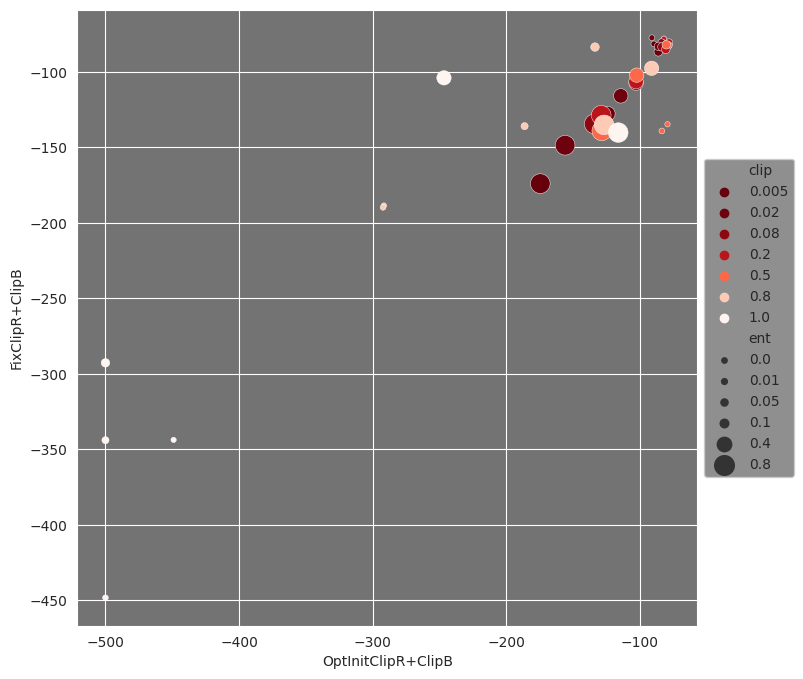

In [4]:
returns = plot_returns("Acrobot-v1", ents, clips, y_max=-75)

## 2. Asterix

Shape: (8, 6, 7, 63)
Max: 42.5625
Shape: (8, 6, 7, 63)
Max: 44.929688


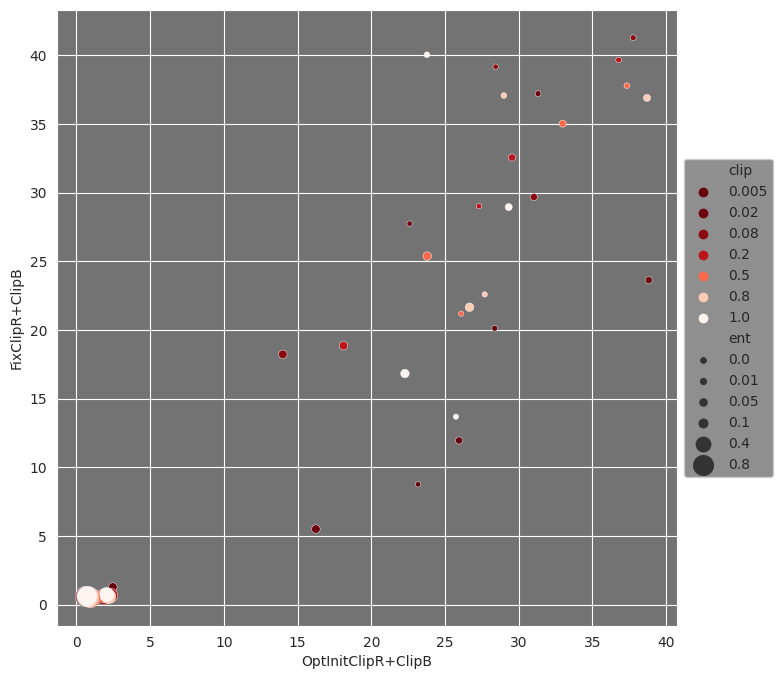

In [5]:
returns = plot_returns("Asterix-MinAtar", ents, clips, y_max=35, tick=5)

## 3. Breakout

Shape: (8, 6, 7, 63)
Max: 91.09375
Shape: (8, 6, 7, 63)
Max: 95.6875


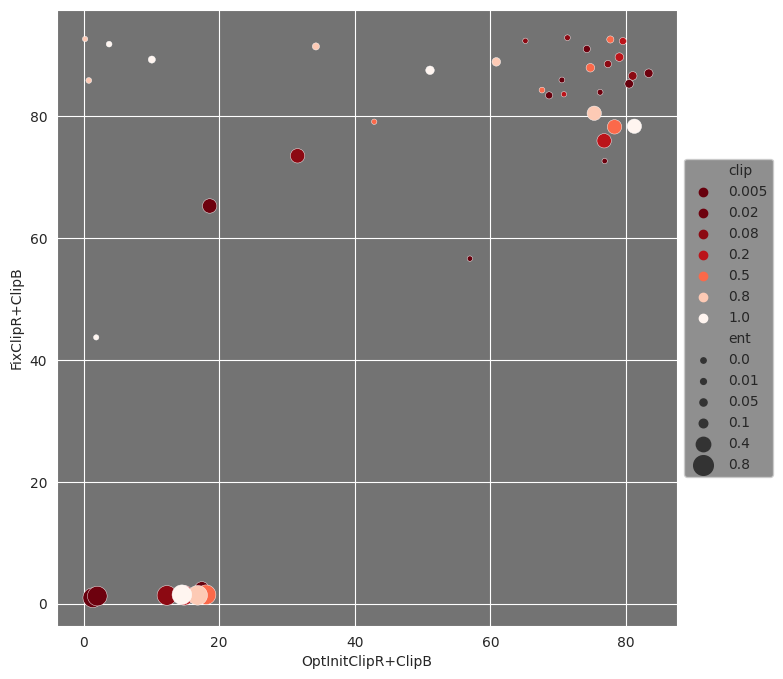

In [6]:
returns = plot_returns("Breakout-MinAtar", ents, clips, y_max=78, tick=5)

## 4. CartPole

Shape: (8, 6, 7, 31)
Max: 500.0
Shape: (8, 6, 7, 31)
Max: 500.0


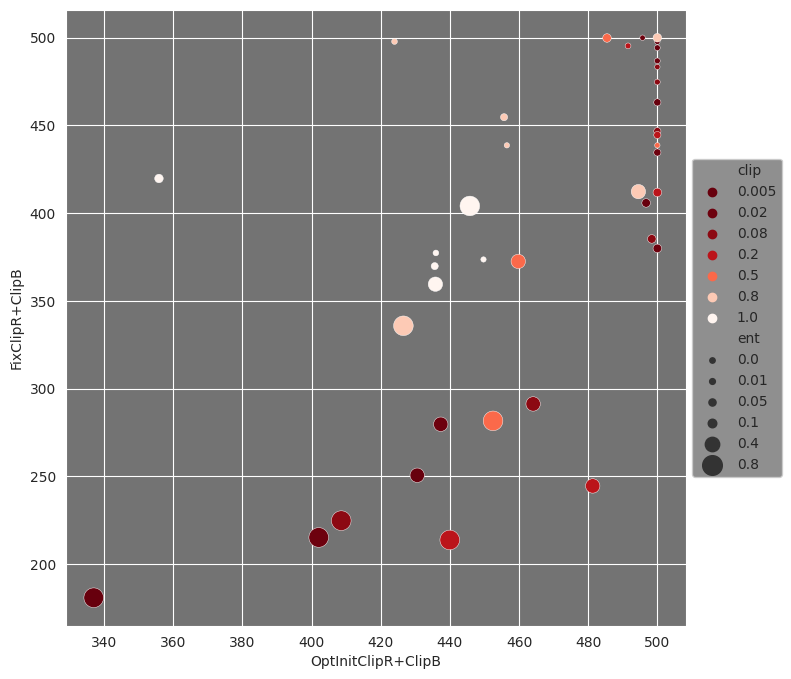

In [7]:
returns = plot_returns("CartPole-v1", ents, clips, y_max=505)

## 5. Freeway

Shape: (8, 6, 7, 63)
Max: 65.75781
Shape: (8, 6, 7, 63)
Max: 62.476562


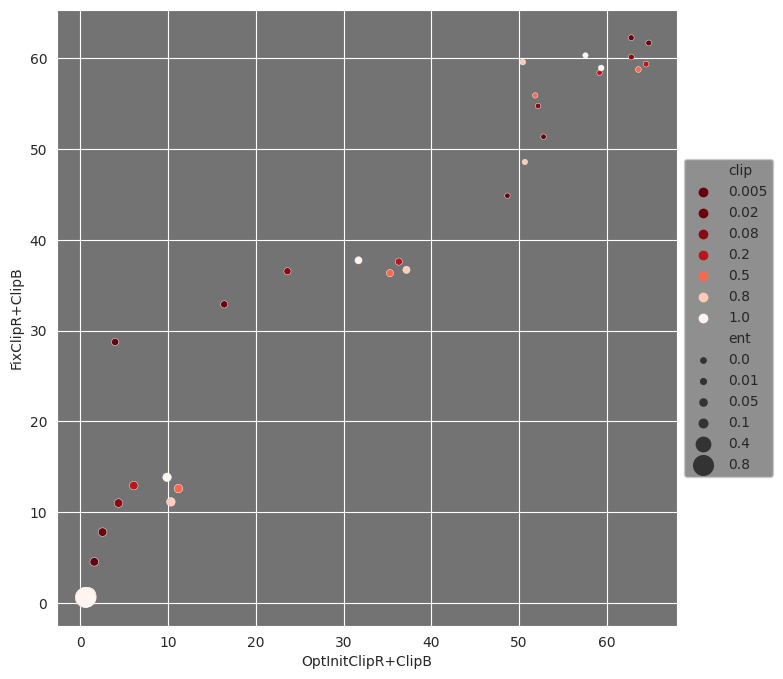

In [8]:
returns = plot_returns("Freeway-MinAtar", ents, clips, y_max=65, tick=5)

## 6. MountainCar

Shape: (8, 6, 7, 26)
Max: -98.4140625
Shape: (8, 6, 7, 26)
Max: -99.625


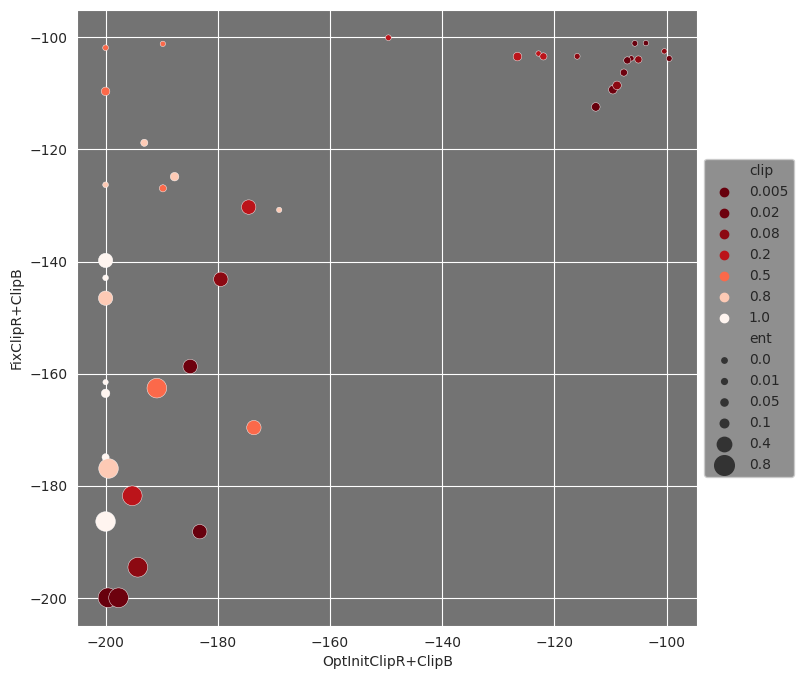

In [9]:
returns = plot_returns("MountainCar-v0", ents, clips, y_max=-99)

## 7. SpaceInvaders

Shape: (8, 6, 7, 63)
Max: 172.82031
Shape: (8, 6, 7, 63)
Max: 177.01562


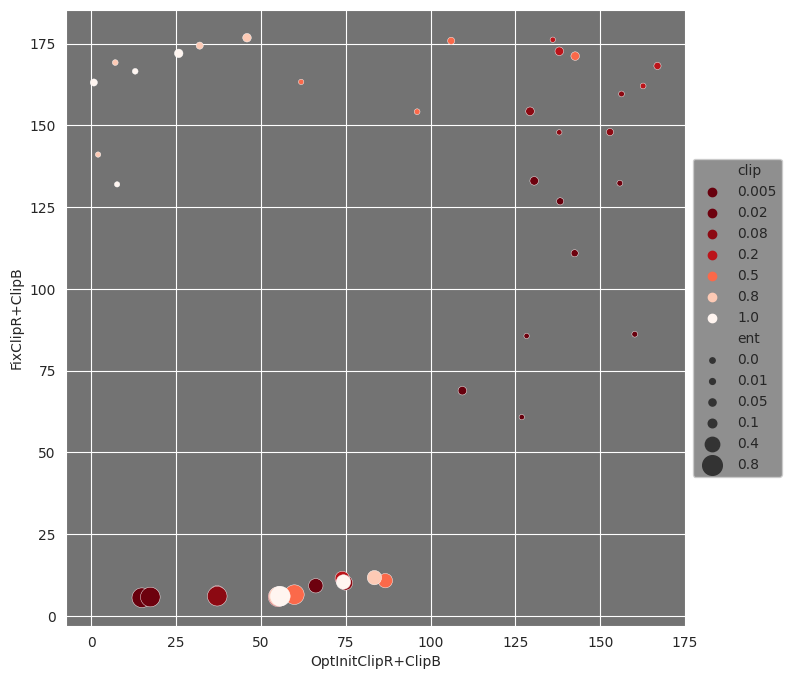

In [10]:
returns = plot_returns("SpaceInvaders-MinAtar", ents, clips, y_max=171)